Using sample data instead of insurance.csv
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Original columns: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
   total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99  1.01     2        True       True    False    False     True   
1       10.34  1.66     3       False       True    False    False     True   
2       21.01  3.50     3       False       True    False    False     True   
3       23.68  3.31     2       False       True    False    False     True   
4       24.59  3.61     4        True       True    False    False     True   

   time_Dinner  
0         True  
1         True  
2         True  
3         

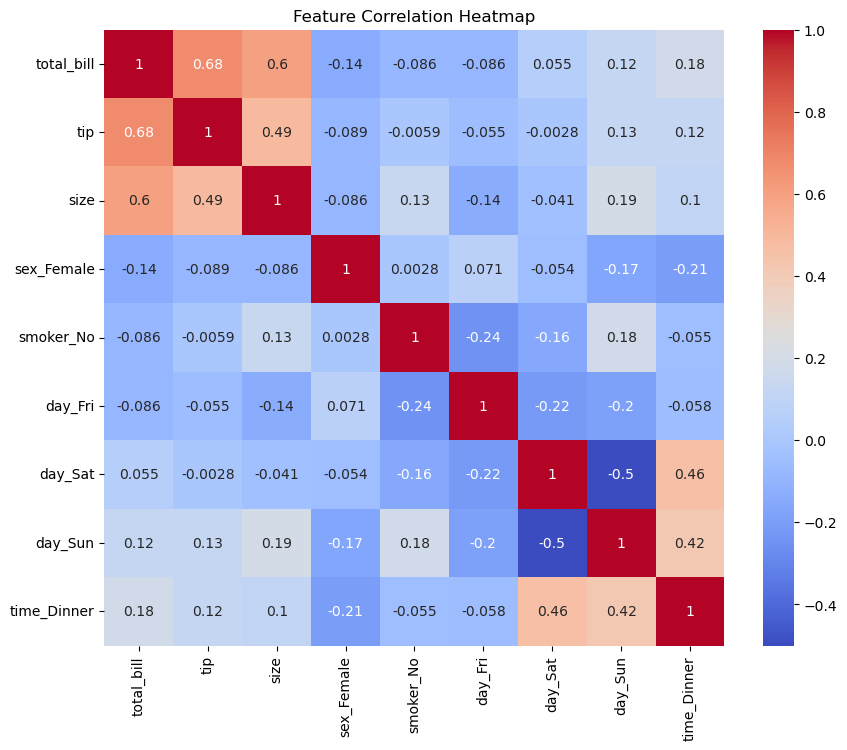

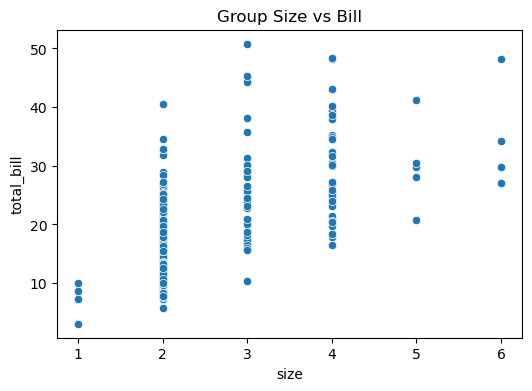

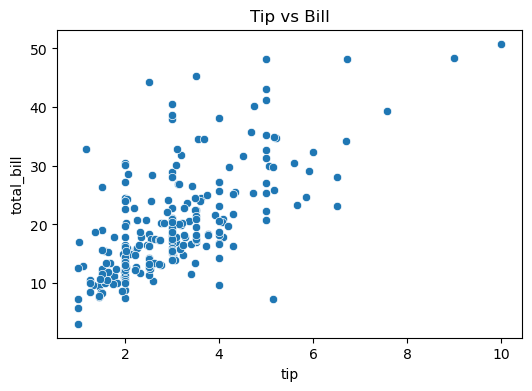

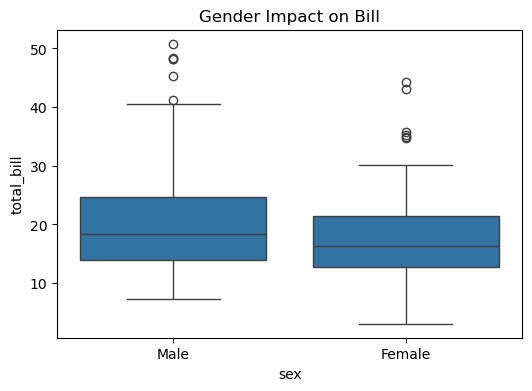

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Added missing pandas import

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Using a sample dataset instead of the missing file
df = sns.load_dataset('tips')
print("Using sample data instead of insurance.csv")
print(df.head())

# Check column names before transformation
print("Original columns:", df.columns.tolist())

# Continue with analysis using the available data
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

# Check column names after transformation
print("Columns after encoding:", df_encoded.columns.tolist())

# Adjust the target variable to match the available dataset
X = df_encoded.drop("total_bill", axis=1)  # Using total_bill instead of charges
y = df_encoded["total_bill"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Use original df for categorical plots
plt.figure(figsize=(6,4))
sns.scatterplot(x="size", y="total_bill", data=df)
plt.title("Group Size vs Bill")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="tip", y="total_bill", data=df)
plt.title("Tip vs Bill")
plt.show()

# Fix: Use 'sex' column from original df instead of 'sex_Male'
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="total_bill", data=df)  # Changed from sex_Male to sex
plt.title("Gender Impact on Bill")
plt.show()